In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## EDA

In [2]:
df = pd.read_csv('personality_dataset.csv')
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [3]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)
df.dropna(inplace=True)

/tmp/ipykernel_2499/3881110434.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes': 1, 'No': 0}, inplace=True)


In [4]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,Extrovert
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,Introvert
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,Introvert
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,Extrovert
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2892,9.0,1.0,2.0,0.0,1.0,1.0,2.0,Introvert
2895,3.0,0.0,7.0,6.0,0.0,6.0,6.0,Extrovert
2896,3.0,0.0,8.0,3.0,0.0,14.0,9.0,Extrovert
2897,4.0,1.0,1.0,1.0,1.0,4.0,0.0,Introvert


In [5]:
df['Extrovert'] = df.Personality.str.contains('E').astype(int)
df.drop(columns=['Personality'], inplace=True)


In [6]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Extrovert
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,1
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,0
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,0
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,1
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,1
...,...,...,...,...,...,...,...,...
2892,9.0,1.0,2.0,0.0,1.0,1.0,2.0,0
2895,3.0,0.0,7.0,6.0,0.0,6.0,6.0,1
2896,3.0,0.0,8.0,3.0,0.0,14.0,9.0,1
2897,4.0,1.0,1.0,1.0,1.0,4.0,0.0,0


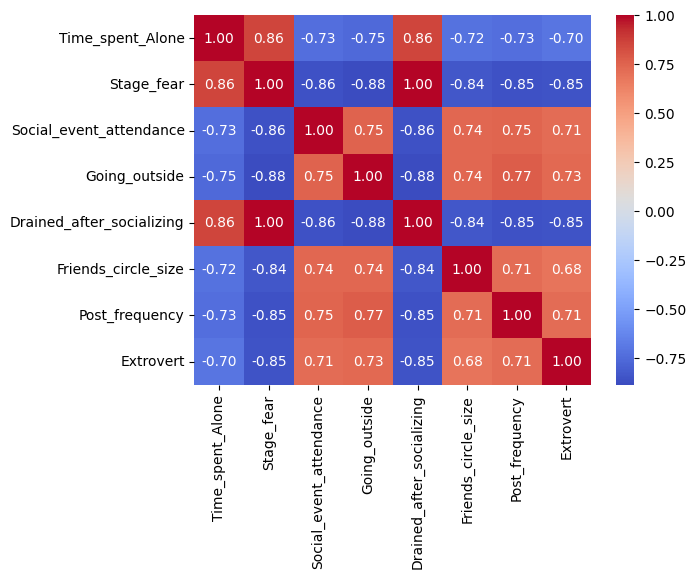

In [7]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## Model Train

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import train_test_split

In [14]:
x_train , x_test , y_train , y_test = train_test_split(df[['Time_spent_Alone','Stage_fear',	'Social_event_attendance',	'Going_outside',	'Drained_after_socializing',	'Friends_circle_size',	'Post_frequency']],df.Extrovert, train_size=0.7 )

In [15]:
model.fit(x_train,y_train)

LogisticRegression()

In [16]:
model.score(x_test,y_test)

0.928763440860215

In [17]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[352,  26],
       [ 27, 339]])

## Prediction

Text(95.72222222222221, 0.5, 'Truth')

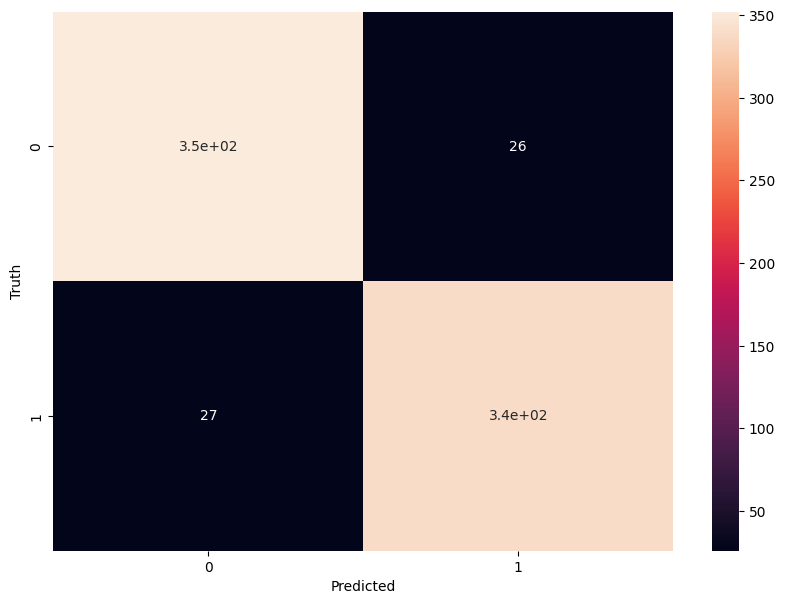

In [18]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')